In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [3]:
data = pd.read_csv('student.csv')
print(data.shape)
data.head()

(1000, 3)


,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


In [4]:
math = data['Math'].values
read = data['Reading'].values
write = data['Writing'].values

C:\Users\202LAB\AppData\Local\Temp\ipykernel_14832\1340142469.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


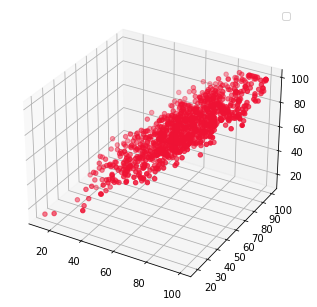

In [5]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(math, read, write, color='#ef1234')
plt.legend()
plt.show()

In [6]:
m = len(math)
x0 = np.ones(m)
X = np.array([x0, math, read]).T

In [10]:
B = np.array([0, 0, 0])
Y = np.array(write)
alpha = 0.0001
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

inital_cost = cost_function(X, Y, B)
print("Initial Cost")
print(inital_cost)

def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    for iteration in range(iterations):
        h = X.dot(B)
        loss = h - Y
        gradient = X.T.dot(loss) / m
        B = B - alpha * gradient
    cost = cost_function(X, Y, B)
    cost_history[iteration] = cost
    return B, cost_history
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)
print("New Coefficients")
print(newB)
print("Final Cost")
print(cost_history[-1])

Initial Cost
2470.11
New Coefficients
[-0.47889172  0.09137252  0.90144884]
Final Cost
10.475123473539167


In [11]:
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

In [12]:
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2
Y_pred = X.dot(newB)
print("R2 Score")
print(r2_score(Y, Y_pred))

R2 Score
0.9097223273061553
